# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import prettytable as pt
import random
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [2]:
def draw_points(points, title=''):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    vis.add_title(title)
    vis.show()

In [76]:
def draw_line(points_left, points_mid, points_right, title=''):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=10, color=['green'])
    vis.add_point(points_mid, s=10, color=['purple'])
    vis.add_point(points_right, s=10, color=['orange'])
    vis.add_title(title)
    vis.show()

In [4]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

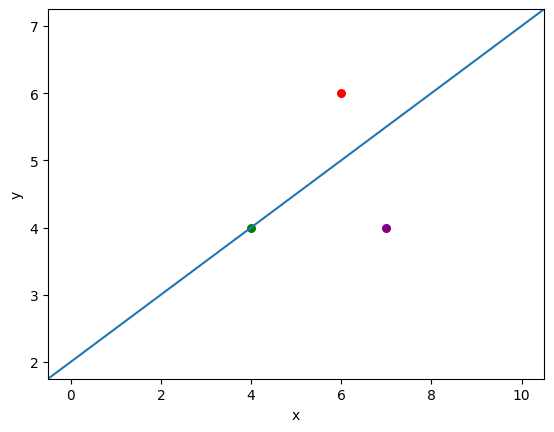

In [5]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [6]:
def generate_uniform_points(left, right, n = 10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    arr = [(random.uniform(left, right), random.uniform(left, right)) for _ in range(n)]
    return arr

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [7]:
points_a_f64 = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

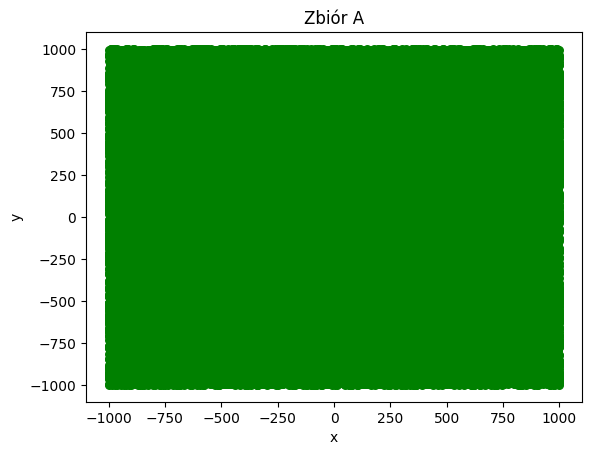

In [8]:
draw_points(points_a_f64, "Zbiór A")

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [9]:
points_b_f64 = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

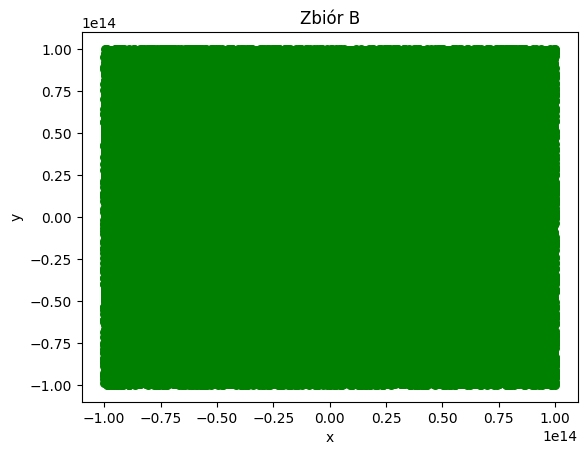

In [10]:
draw_points(points_b_f64, "Zbiór B")

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [11]:
def generate_circle_points(O, R, n=100):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    arr = [(np.cos(2*np.pi*i/n)*R, np.sin(2*np.pi*i/n)*R) for i in range(n)]
    return arr

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [12]:
points_c_f64 = generate_circle_points((0, 0), 100, 1000)

Zwizualizuj wygenerowane punkty.

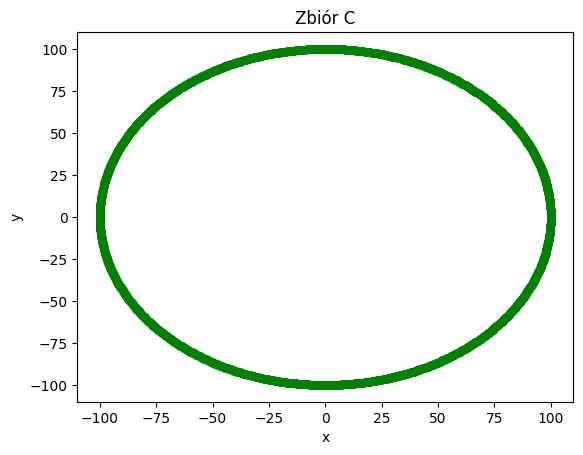

In [13]:
draw_points(points_c_f64, "Zbiór C")

Uzupełnij funkcję ```generate_collinear_points```.

In [14]:
def generate_collinear_points(a, b, n=1000):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na prostej ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek wektora tworzącego prostą
    :param b: krotka współrzędnych oznaczająca koniec wektora tworzącego prostą
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    arr =[]
    c = (a[1]-b[1])/(a[0]-b[0])
    d = a[1]-a[0]*c
    for i in range(n):
        x = random.uniform(-1000, 1000)
        y = c*x+d
        arr.append((x, y))
    return arr

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [15]:
points_d_f64= generate_collinear_points((-1.0, 0.0), (1.0,0.1))

Zwizualizuj wygenerowane punkty.

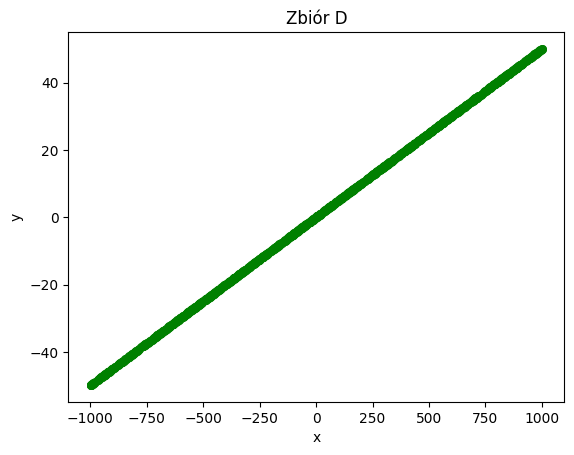

In [16]:
draw_points(points_d_f64, "Zbiór D")

Przeprowadź test poprawności powyższych funkcji

In [17]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.125s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [18]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return (b[0]-a[0])*(c[1]-b[1])-(b[1]-a[1])*(c[0]-b[0])

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [19]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    arr = [[a[0], a[1], 1], [b[0], b[1], 1], [c[0], c[1], 1]]
    return np.linalg.det(arr)

Uzupełnij funkcje ```mat_det_2x2```

In [20]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return (a[0]-c[0])*(b[1]-c[1])-(a[1]-c[1])*(b[0]-c[0])
    raise Exception("Unimplemented")

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [21]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    arr = [[a[0]-c[0], a[1]-c[1]], [b[0]-c[0], b[1]-c[1]]]
    return np.linalg.det(arr)

Przetestujmy napisane powyżej funkcje.

In [22]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [23]:
def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """
    left = []
    line = []
    right = []
    for i in range(len(points)):
        c = points[i]
        det = mat_det_func(a, b, c)
        if det>eps:
            left.append(c)
        elif det<-eps:
            right.append(c)
        else:
            line.append(c)
    return left, line, right

In [24]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

In [25]:
tolerances = [0, 10**(-14), 10**(-12), 10**(-10), 10**(-8)]

In [26]:
def print_res(points, det, eps=0):
    left, line, right = categorize_points(points, a, b, det, eps)
    draw_line(left, line, right)
    
    print("Number of points:")
    print(f"Left side: {len(left)}")
    print(f"Right side: {len(right)}")
    print(f"Collinear: {len(line)}")

In [27]:
def generate_tables(points):
    dets = [mat_det_2x2, mat_det_2x2_lib, mat_det_3x3, mat_det_3x3_lib]
    tabs = []
    for i in range(len(dets)):
        x = pt.PrettyTable()
        x.field_names = ["Tolerancja", "Po lewej", "Na prostej", "Po prawej"]
        for epsilon in tolerances:
            left, line, right = categorize_points(points, a, b, dets[i], epsilon)
            x.add_row([epsilon, len(left), len(line), len(right)])
        x.title = f"Użyta funkcja do obliczenia wyznacznika: {dets[i].__name__}"
        tabs.append(x)
    for tab in tabs:
        print(tab.get_string()) 

# Precyzja float64

## Zbiór A

Number of points:
Left side: 49668
Right side: 50332
Collinear: 0


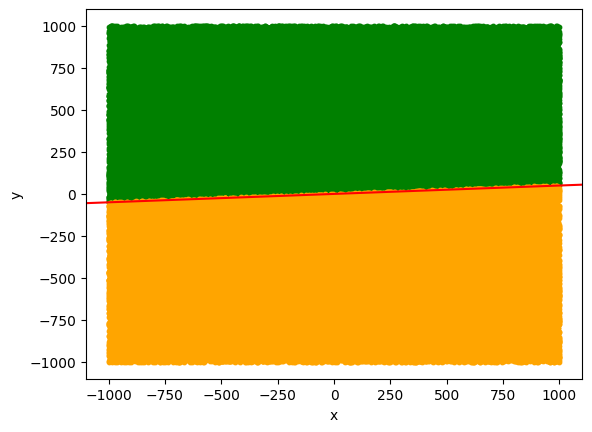

In [28]:
print_res(points_a_f64, mat_det_2x2)

Number of points:
Left side: 49668
Right side: 50332
Collinear: 0


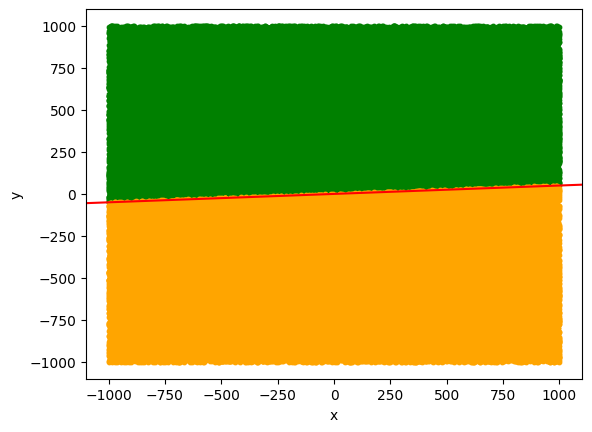

In [29]:
print_res(points_a_f64, mat_det_2x2_lib)

Number of points:
Left side: 49668
Right side: 50332
Collinear: 0


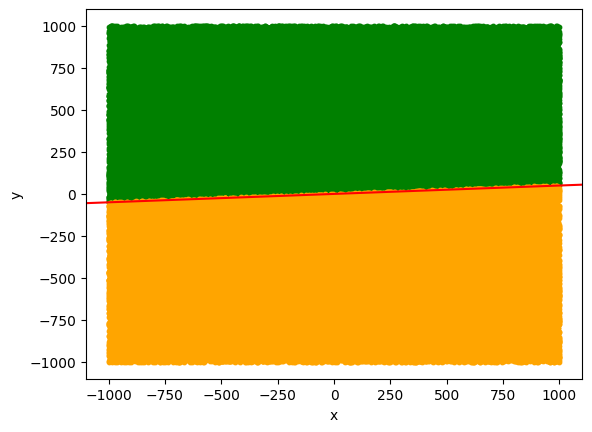

In [30]:
print_res(points_a_f64, mat_det_3x3)

Number of points:
Left side: 49668
Right side: 50332
Collinear: 0


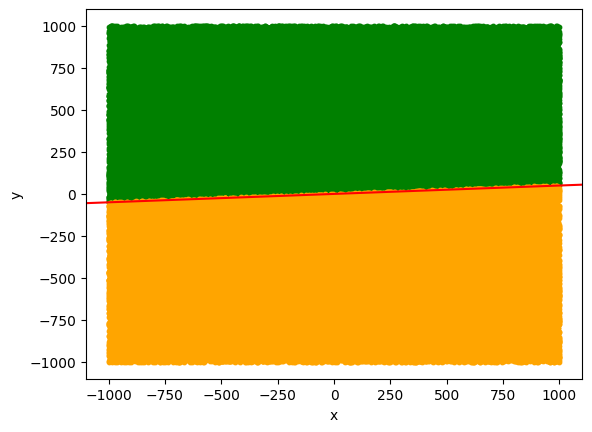

In [31]:
print_res(points_a_f64, mat_det_3x3_lib)

In [32]:
generate_tables(points_a_f64)

+------------------------------------------------------+
| Użyta funkcja do obliczenia wyznacznika: mat_det_2x2 |
+-------------+-----------+-------------+--------------+
|  Tolerancja |  Po lewej |  Na prostej |  Po prawej   |
+-------------+-----------+-------------+--------------+
|      0      |   49668   |      0      |    50332     |
|    1e-14    |   49668   |      0      |    50332     |
|    1e-12    |   49668   |      0      |    50332     |
|    1e-10    |   49668   |      0      |    50332     |
|    1e-08    |   49668   |      0      |    50332     |
+-------------+-----------+-------------+--------------+
+----------------------------------------------------------+
| Użyta funkcja do obliczenia wyznacznika: mat_det_2x2_lib |
+--------------+------------+--------------+---------------+
|  Tolerancja  |  Po lewej  |  Na prostej  |   Po prawej   |
+--------------+------------+--------------+---------------+
|      0       |   49668    |      0       |     50332     |
|    1e

## Zbiór B

Number of points:
Left side: 49960
Right side: 50032
Collinear: 8


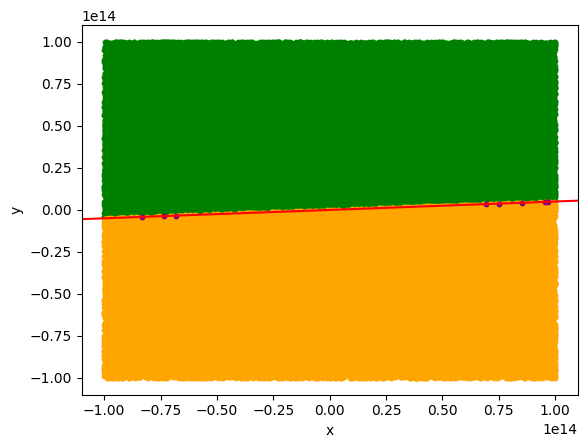

In [33]:
print_res(points_b_f64, mat_det_2x2)

Number of points:
Left side: 49960
Right side: 50034
Collinear: 6


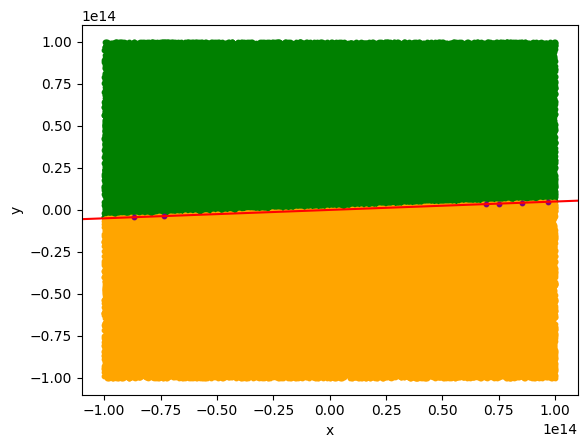

In [34]:
print_res(points_b_f64, mat_det_2x2_lib)

Number of points:
Left side: 49962
Right side: 50038
Collinear: 0


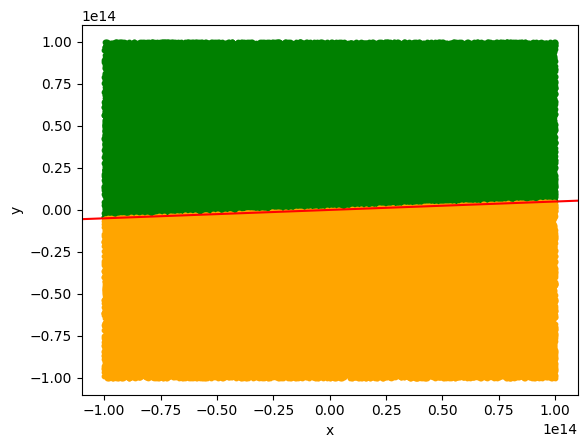

In [35]:
print_res(points_b_f64, mat_det_3x3)

Number of points:
Left side: 49962
Right side: 50038
Collinear: 0


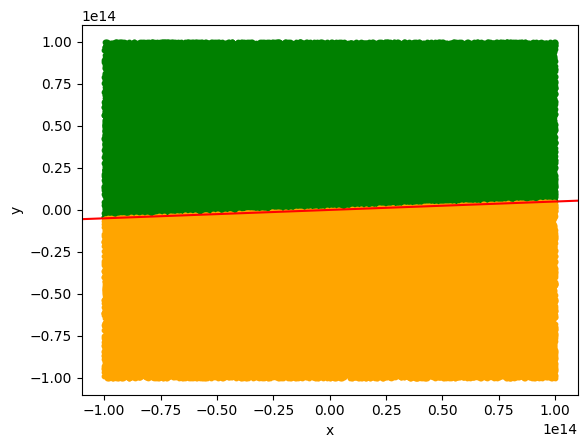

In [36]:
print_res(points_b_f64, mat_det_3x3_lib)

In [37]:
generate_tables(points_b_f64)

+------------------------------------------------------+
| Użyta funkcja do obliczenia wyznacznika: mat_det_2x2 |
+-------------+-----------+-------------+--------------+
|  Tolerancja |  Po lewej |  Na prostej |  Po prawej   |
+-------------+-----------+-------------+--------------+
|      0      |   49960   |      8      |    50032     |
|    1e-14    |   49960   |      8      |    50032     |
|    1e-12    |   49960   |      8      |    50032     |
|    1e-10    |   49960   |      8      |    50032     |
|    1e-08    |   49960   |      8      |    50032     |
+-------------+-----------+-------------+--------------+
+----------------------------------------------------------+
| Użyta funkcja do obliczenia wyznacznika: mat_det_2x2_lib |
+--------------+------------+--------------+---------------+
|  Tolerancja  |  Po lewej  |  Na prostej  |   Po prawej   |
+--------------+------------+--------------+---------------+
|      0       |   49960    |      6       |     50034     |
|    1e

## Zbiór C

Number of points:
Left side: 499
Right side: 501
Collinear: 0


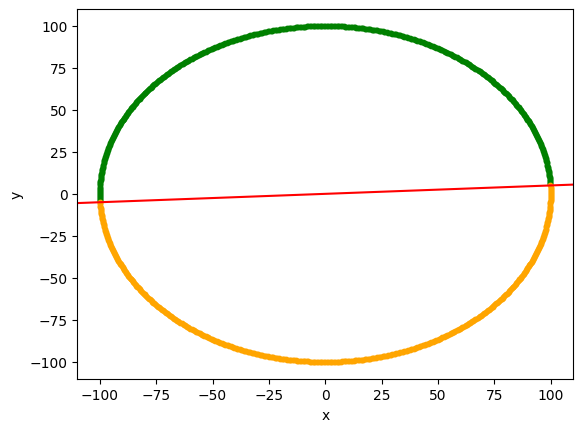

In [38]:
print_res(points_c_f64, mat_det_2x2)

Number of points:
Left side: 499
Right side: 501
Collinear: 0


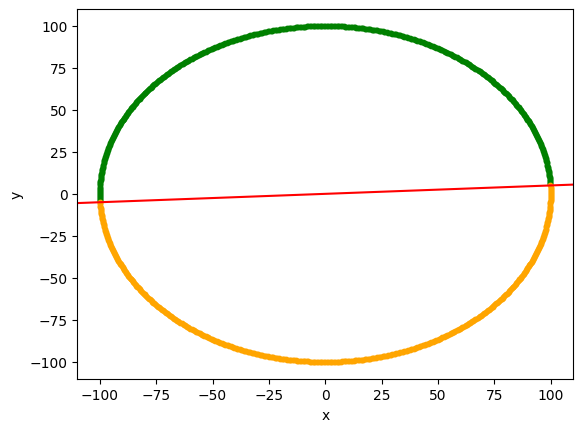

In [39]:
print_res(points_c_f64, mat_det_2x2_lib)

Number of points:
Left side: 499
Right side: 501
Collinear: 0


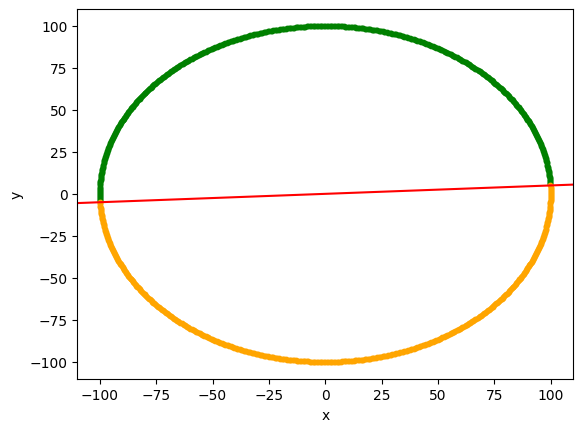

In [40]:
print_res(points_c_f64, mat_det_3x3)

Number of points:
Left side: 499
Right side: 501
Collinear: 0


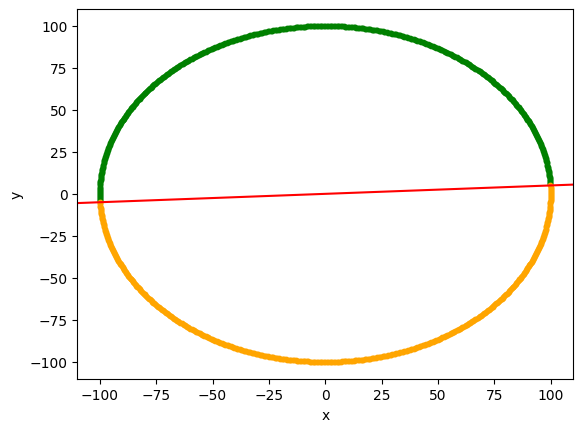

In [41]:
print_res(points_c_f64, mat_det_3x3_lib)

In [42]:
generate_tables(points_c_f64)

+------------------------------------------------------+
| Użyta funkcja do obliczenia wyznacznika: mat_det_2x2 |
+-------------+-----------+-------------+--------------+
|  Tolerancja |  Po lewej |  Na prostej |  Po prawej   |
+-------------+-----------+-------------+--------------+
|      0      |    499    |      0      |     501      |
|    1e-14    |    499    |      0      |     501      |
|    1e-12    |    499    |      0      |     501      |
|    1e-10    |    499    |      0      |     501      |
|    1e-08    |    499    |      0      |     501      |
+-------------+-----------+-------------+--------------+
+----------------------------------------------------------+
| Użyta funkcja do obliczenia wyznacznika: mat_det_2x2_lib |
+--------------+------------+--------------+---------------+
|  Tolerancja  |  Po lewej  |  Na prostej  |   Po prawej   |
+--------------+------------+--------------+---------------+
|      0       |    499     |      0       |      501      |
|    1e

## Zbiór D

Number of points:
Left side: 151
Right side: 125
Collinear: 724


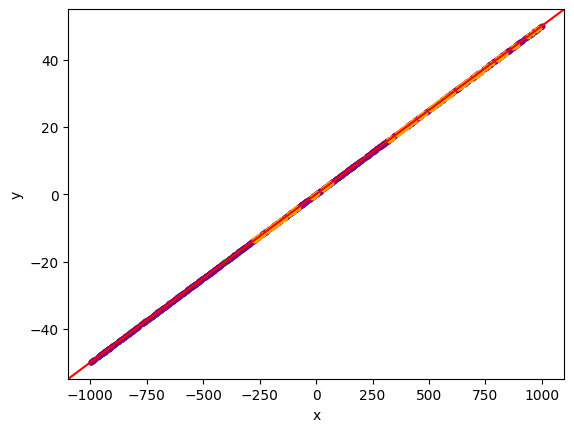

In [77]:
print_res(points_d_f64, mat_det_2x2)

Number of points:
Left side: 109
Right side: 96
Collinear: 795


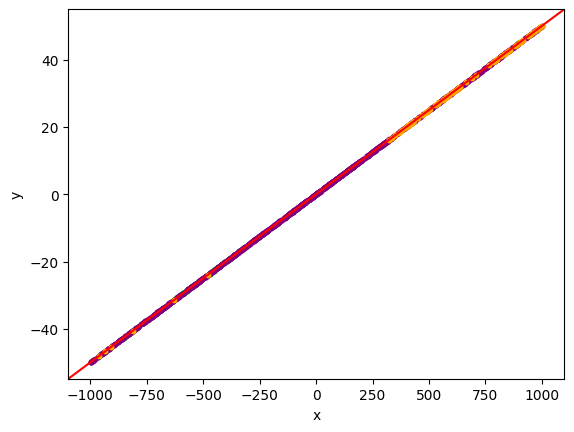

In [78]:
print_res(points_d_f64, mat_det_2x2_lib, 10**(-12))

Number of points:
Left side: 126
Right side: 298
Collinear: 576


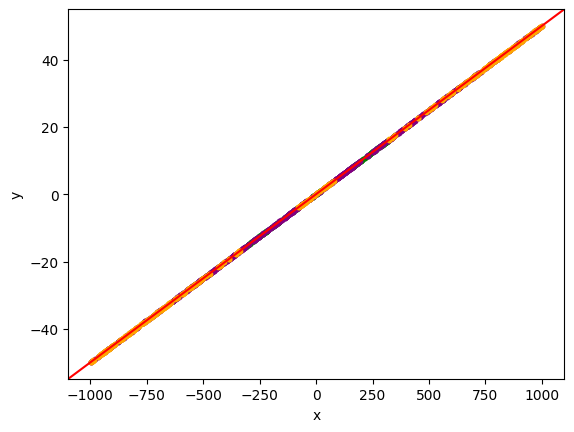

In [79]:
print_res(points_d_f64, mat_det_3x3)

Number of points:
Left side: 0
Right side: 0
Collinear: 1000


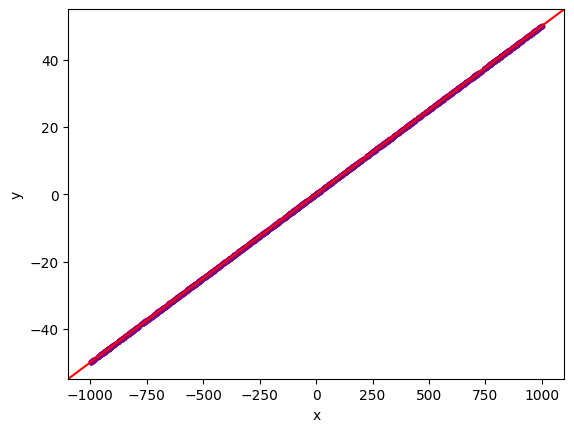

In [80]:
print_res(points_d_f64, mat_det_3x3_lib, 10**(-12))

In [47]:
generate_tables(points_d_f64)

+------------------------------------------------------+
| Użyta funkcja do obliczenia wyznacznika: mat_det_2x2 |
+-------------+-----------+-------------+--------------+
|  Tolerancja |  Po lewej |  Na prostej |  Po prawej   |
+-------------+-----------+-------------+--------------+
|      0      |    151    |     724     |     125      |
|    1e-14    |    141    |     739     |     120      |
|    1e-12    |     74    |     859     |      67      |
|    1e-10    |     0     |     1000    |      0       |
|    1e-08    |     0     |     1000    |      0       |
+-------------+-----------+-------------+--------------+
+----------------------------------------------------------+
| Użyta funkcja do obliczenia wyznacznika: mat_det_2x2_lib |
+--------------+------------+--------------+---------------+
|  Tolerancja  |  Po lewej  |  Na prostej  |   Po prawej   |
+--------------+------------+--------------+---------------+
|      0       |    166     |     680      |      154      |
|    1e

# Kwalifikacja

In [48]:
def assign(points, det, tolerance):
    '''
    Funkcja przypisująca wartość LEFT/COLLINEAR/RIGHT dla każdego punktu
    w zależności od kwalifikacji wg danego wyznacznika
    '''
    left, line, right = categorize_points(points, a, b, det, tolerance)
    res = []
    for point in left:
        res.append([point, "LEFT"])
    for point in line:
        res.append([point, "LINE"])
    for point in right:
        res.append([point, "RIGHT"])
    return res

In [49]:
def find_diffs(points, det1, det2, tolerance=0):
    set1 = sorted(assign(points, det1, tolerance))
    set2 = sorted(assign(points, det2, tolerance))
    diffs = []
    for i in range(len(points)):
        if set1[i][0]==set2[i][0] and set1[i][1]!=set2[i][1]:
            diffs.append(set1[i][0])
    return diffs

In [50]:
def print_diffs(points, det1, det2, tolerance=0):
    diffs = find_diffs(points, det1, det2, tolerance)
    print(f"Diffs: {len(diffs)}")
    if not diffs: return
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='black')
    for point in diffs:
        vis.add_point((point[0], point[1]), s=10, color='red')
    vis.show()
    for i in range(5):
        print(points[i])

## Zbiór A

In [51]:
print_diffs(points_a_f64, mat_det_2x2, mat_det_2x2_lib)

Diffs: 0


In [52]:
print_diffs(points_a_f64, mat_det_3x3, mat_det_3x3_lib)

Diffs: 0


## Zbiór B

Diffs: 4
(-5476925964507.0, 17080425403796.328)
(47131505335290.19, 60534757130825.75)
(8298645965973.25, -87782351485712.03)
(28135442407391.406, -36167576959466.195)
(-32148909090730.938, -58341983249061.19)


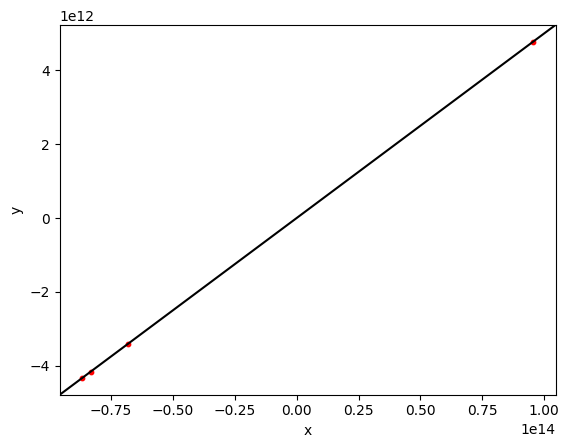

In [53]:
print_diffs(points_b_f64, mat_det_2x2, mat_det_2x2_lib)

In [54]:
print_diffs(points_b_f64, mat_det_3x3, mat_det_3x3_lib)

Diffs: 0


## Zbiór C

In [55]:
print_diffs(points_c_f64, mat_det_2x2, mat_det_2x2_lib)

Diffs: 0


In [56]:
print_diffs(points_c_f64, mat_det_3x3, mat_det_3x3_lib)

Diffs: 0


## Zbiór D

Diffs: 417
(-82.09659513757026, -4.054829756878513)
(-962.6622884370651, -48.08311442185326)
(255.4734384937965, 12.823671924689826)
(487.6112805494331, 24.430564027471657)
(103.34936823472526, 5.217468411736263)


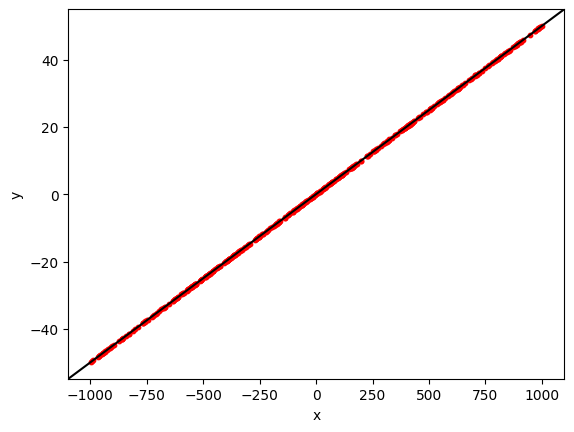

In [57]:
print_diffs(points_d_f64, mat_det_2x2, mat_det_2x2_lib)

Diffs: 516
(-82.09659513757026, -4.054829756878513)
(-962.6622884370651, -48.08311442185326)
(255.4734384937965, 12.823671924689826)
(487.6112805494331, 24.430564027471657)
(103.34936823472526, 5.217468411736263)


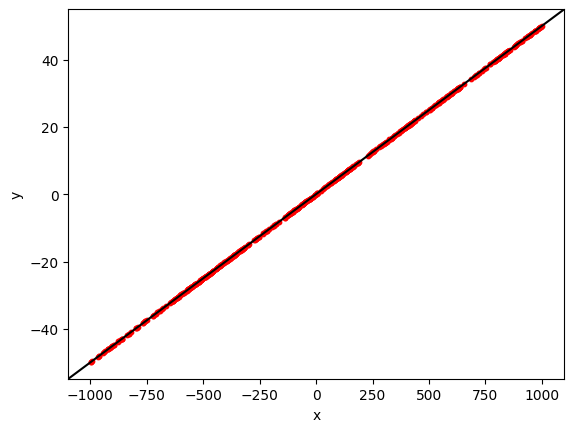

In [58]:
print_diffs(points_d_f64, mat_det_3x3, mat_det_3x3_lib)

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [59]:
points_a_f32 = np.float32(points_a_f64)
points_b_f32 = np.float32(points_b_f64)
points_c_f32 = np.float32(points_c_f64)
points_d_f32 = np.float32(points_d_f64)

Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

## Zbiór A

Number of points:
Left side: 49668
Right side: 50332
Collinear: 0


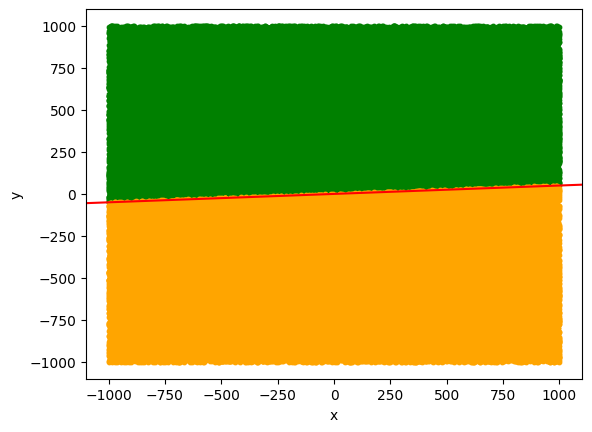

In [60]:
print_res(points_a_f32, mat_det_2x2)

In [61]:
generate_tables(points_a_f32)

+------------------------------------------------------+
| Użyta funkcja do obliczenia wyznacznika: mat_det_2x2 |
+-------------+-----------+-------------+--------------+
|  Tolerancja |  Po lewej |  Na prostej |  Po prawej   |
+-------------+-----------+-------------+--------------+
|      0      |   49668   |      0      |    50332     |
|    1e-14    |   49668   |      0      |    50332     |
|    1e-12    |   49668   |      0      |    50332     |
|    1e-10    |   49668   |      0      |    50332     |
|    1e-08    |   49668   |      0      |    50332     |
+-------------+-----------+-------------+--------------+
+----------------------------------------------------------+
| Użyta funkcja do obliczenia wyznacznika: mat_det_2x2_lib |
+--------------+------------+--------------+---------------+
|  Tolerancja  |  Po lewej  |  Na prostej  |   Po prawej   |
+--------------+------------+--------------+---------------+
|      0       |   49668    |      0       |     50332     |
|    1e

## Zbiór B

Number of points:
Left side: 49958
Right side: 50031
Collinear: 11


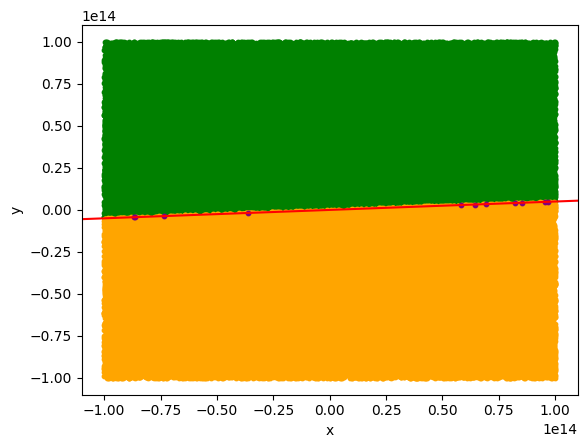

In [62]:
print_res(points_b_f32, mat_det_2x2)

Number of points:
Left side: 49957
Right side: 50034
Collinear: 9


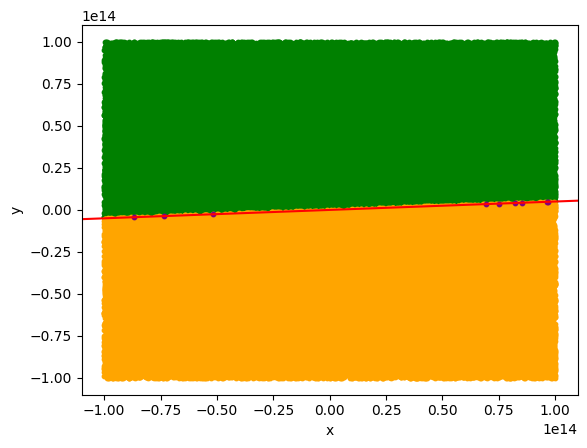

In [63]:
print_res(points_b_f32, mat_det_2x2_lib)

In [64]:
generate_tables(points_b_f32)

+------------------------------------------------------+
| Użyta funkcja do obliczenia wyznacznika: mat_det_2x2 |
+-------------+-----------+-------------+--------------+
|  Tolerancja |  Po lewej |  Na prostej |  Po prawej   |
+-------------+-----------+-------------+--------------+
|      0      |   49958   |      11     |    50031     |
|    1e-14    |   49958   |      11     |    50031     |
|    1e-12    |   49958   |      11     |    50031     |
|    1e-10    |   49958   |      11     |    50031     |
|    1e-08    |   49958   |      11     |    50031     |
+-------------+-----------+-------------+--------------+
+----------------------------------------------------------+
| Użyta funkcja do obliczenia wyznacznika: mat_det_2x2_lib |
+--------------+------------+--------------+---------------+
|  Tolerancja  |  Po lewej  |  Na prostej  |   Po prawej   |
+--------------+------------+--------------+---------------+
|      0       |   49957    |      9       |     50034     |
|    1e

## Zbiór C

Number of points:
Left side: 499
Right side: 501
Collinear: 0


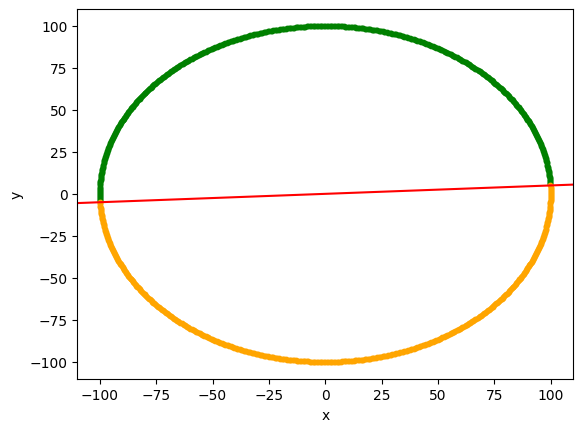

In [65]:
print_res(points_c_f32, mat_det_2x2)

In [66]:
generate_tables(points_c_f32)

+------------------------------------------------------+
| Użyta funkcja do obliczenia wyznacznika: mat_det_2x2 |
+-------------+-----------+-------------+--------------+
|  Tolerancja |  Po lewej |  Na prostej |  Po prawej   |
+-------------+-----------+-------------+--------------+
|      0      |    499    |      0      |     501      |
|    1e-14    |    499    |      0      |     501      |
|    1e-12    |    499    |      0      |     501      |
|    1e-10    |    499    |      0      |     501      |
|    1e-08    |    499    |      0      |     501      |
+-------------+-----------+-------------+--------------+
+----------------------------------------------------------+
| Użyta funkcja do obliczenia wyznacznika: mat_det_2x2_lib |
+--------------+------------+--------------+---------------+
|  Tolerancja  |  Po lewej  |  Na prostej  |   Po prawej   |
+--------------+------------+--------------+---------------+
|      0       |    499     |      0       |      501      |
|    1e

## Zbiór D

Number of points:
Left side: 415
Right side: 424
Collinear: 161


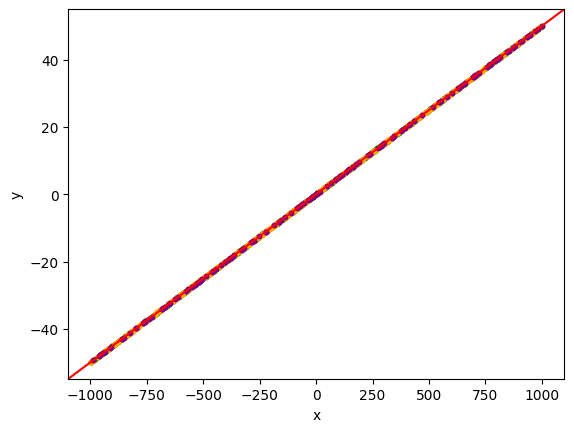

In [67]:
print_res(points_d_f32, mat_det_2x2, 10**(-8))

Number of points:
Left side: 415
Right side: 424
Collinear: 161


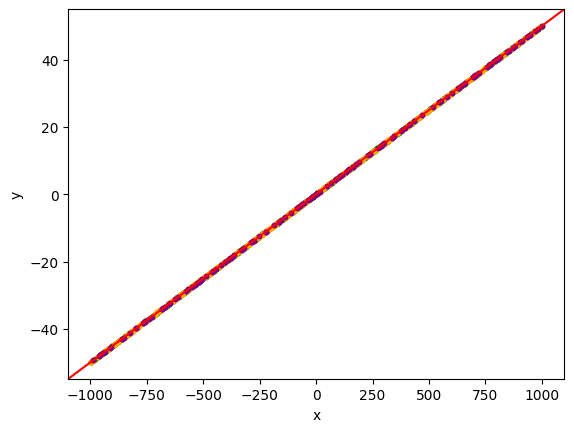

In [68]:
print_res(points_d_f32, mat_det_2x2_lib, 10**(-8))

Number of points:
Left side: 415
Right side: 424
Collinear: 161


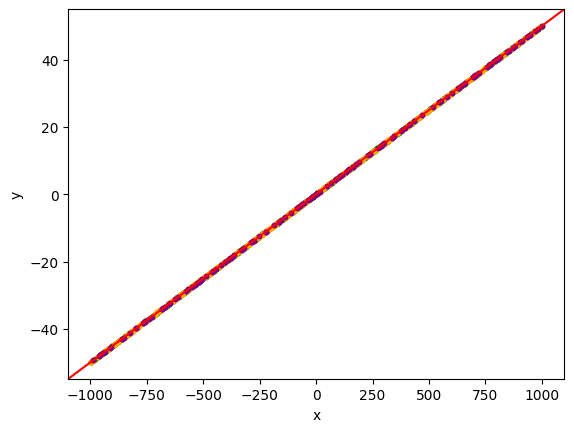

In [69]:
print_res(points_d_f32, mat_det_3x3, 10**(-8))

Number of points:
Left side: 415
Right side: 424
Collinear: 161


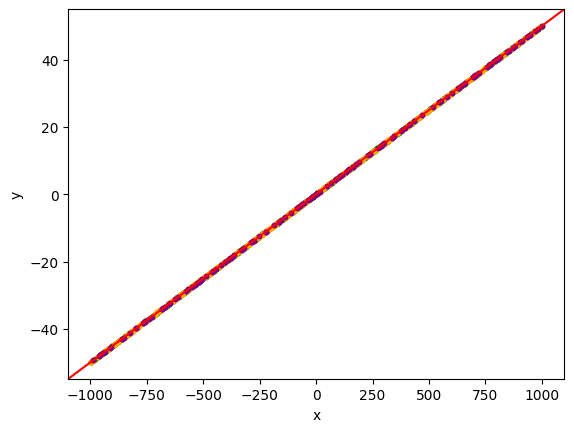

In [70]:
print_res(points_d_f32, mat_det_3x3_lib, 10**(-8))

In [71]:
generate_tables(points_d_f32)

+------------------------------------------------------+
| Użyta funkcja do obliczenia wyznacznika: mat_det_2x2 |
+-------------+-----------+-------------+--------------+
|  Tolerancja |  Po lewej |  Na prostej |  Po prawej   |
+-------------+-----------+-------------+--------------+
|      0      |    427    |     139     |     434      |
|    1e-14    |    426    |     141     |     433      |
|    1e-12    |    415    |     159     |     426      |
|    1e-10    |    415    |     159     |     426      |
|    1e-08    |    415    |     161     |     424      |
+-------------+-----------+-------------+--------------+
+----------------------------------------------------------+
| Użyta funkcja do obliczenia wyznacznika: mat_det_2x2_lib |
+--------------+------------+--------------+---------------+
|  Tolerancja  |  Po lewej  |  Na prostej  |   Po prawej   |
+--------------+------------+--------------+---------------+
|      0       |    445     |     101      |      454      |
|    1e

# Porównanie czasu działania funkcji do obliczania wartości wyznacznika

In [72]:
from datetime import datetime

In [81]:
def calculate_time(det, T):
    start = datetime.now()
    for a, b, c in T:
        result = det[0](a, b, c)
    stop = datetime.now()
    diff = stop - start
    print(f"Czas obliczeń dla wyznacznika {det[1]} to: {str(diff)[-9:]} s")

In [74]:
dets = [(mat_det_2x2, "2x2 własnej implementacji"), (mat_det_2x2_lib, "2x2 z biblioteki numpy"), (mat_det_3x3, "3x3 własnej implementacji"), (mat_det_3x3_lib, "3x3 z biblioteki numpy")]

In [82]:
test = []
for _ in range(10**5):
    test.append([[random.uniform(-1000,1000),random.uniform(-1000,1000)], \
                [random.uniform(-1000,1000),random.uniform(-1000,1000)], \
                [random.uniform(-1000,1000),random.uniform(-1000,1000)]])
for det in dets:
    calculate_time(det, test)

Czas obliczeń dla wyznacznika 2x2 własnej implementacji to: 00.027612 s
Czas obliczeń dla wyznacznika 2x2 z biblioteki numpy to: 00.406808 s
Czas obliczeń dla wyznacznika 3x3 własnej implementacji to: 00.026132 s
Czas obliczeń dla wyznacznika 3x3 z biblioteki numpy to: 00.456546 s


## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.
